In [553]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

In [554]:
data_police_shooting = pandas.read_csv('policeShootingsData.csv')

In [555]:
df_police_shooting = pandas.DataFrame(data_police_shooting)

In [556]:
df_police_shooting.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [557]:
df_police_shooting.shape

(9570, 12)

Verteilung der Morde nach Staaten

In [558]:
df_most_kills_states = df_police_shooting["state"].value_counts()[:10]
type(df_most_kills_states)

pandas.core.series.Series

In [559]:
df_most_kills_states = df_police_shooting["state"].value_counts()[:10]

In [560]:
df_most_kills_states = pandas.DataFrame(df_most_kills_states)

In [561]:
df_most_kills_states.columns = ["Number of Kills"]

In [564]:
other_states_kills_data = {"Other" : other_states_with_not_so_much_kills.sum()
}

other_states_kills_series = pd.Series([other_states_with_not_so_much_kills.sum()], index=["Other"])

In [567]:
other_states_kill_df = pd.DataFrame.from_dict(other_states_kills_data, orient="index", columns=["count"])
other_states_kill_df

,count
Other,4521


In [566]:
other_states_kill_df.columns = ["Number of Kills"]

In [118]:
other_states_kills = df_police_shooting["state"].value_counts()[10:]
other_states_kills.values.sum()

4521

In [110]:
df_most_kills_states

,Number of Kills
state,
CA,1327
TX,907
FL,610
AZ,428
GA,361
CO,343
NC,277
TN,269
OH,269


In [568]:
df_most_kills_states.loc["Other"] = {"Number of Kills": other_states_kills.values.sum() }

KeyError: 'state'

In [570]:
df_most_kills_states[10:]

,Number of Kills
state,
Other,4521


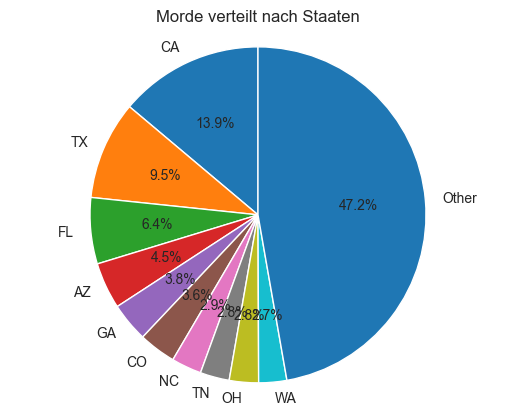

In [572]:
plt.pie(df_most_kills_states["Number of Kills"], labels=df_most_kills_states.index, autopct="%1.1f%%", startangle=90)
plt.axis('equal')
plt.title("Morde verteilt nach Staaten")
plt.show()

In [139]:
df_most_kills_states = df_most_kills_states.drop(index=12)

In [102]:
df_merged = pd.merge(df_most_kills_states, other_states_kill_df, on=df_most_kills_states.index)
df_merged

KeyError: array([], dtype=object)

In [101]:
df_most_kills_states

,Number of Kills_x,Number of Kills_y


In [64]:
other_states_kill_df.index.name = "state"

,count,Number of kills
state,,


In [144]:
df_most_kills_states = pd.DataFrame(df_most_kills_states)

In [72]:
df_most_kills_states = pandas.merge(df_most_kills_states, other_states_kill_df, on="state")
df_most_kills_states

,Number of Kills,Number of kills
state,,


In [337]:
df_state_distribution = df_most_kills_states.append(other_states_kills_series, ignore_index=True)
df_state_distribution

NameError: name 'df_most_kills_states' is not defined

In [50]:
df_most_kills_states = df_most_kills_states.append

ValueError: Length of values (1) does not match length of index (10)

In [132]:
df_state_distribution = pd.concat([df_most_kills_states, other_states_kill_df], axis=1)

In [118]:
df_state_distribution.rename(columns={"count": "Anzahl Morde"})

,Anzahl Morde,Anzahl Morde
CA,1327.0,NaN
TX,907.0,NaN
FL,610.0,NaN
AZ,428.0,NaN
GA,361.0,NaN
CO,343.0,NaN
NC,277.0,NaN
TN,269.0,NaN
OH,269.0,NaN
WA,258.0,NaN


Welches Alter hatten die Opfer

Wieviele opfer waren unter 21

In [213]:
victims_unter_21 = df_police_shooting[df_police_shooting["age"] < 21]
victims_unter_21.describe()

,age
count,603.000000
mean,18.149254
std,1.959120
min,2.000000
25%,17.000000
50%,18.000000
75%,20.000000
max,20.000000


Es waren 603 Opfer unter 21

Anzahl der weiblichen Opfer


Wie alt waren die 5 ältesten Opfer

In [217]:
oldest_victims = df_police_shooting.sort_values(by="age", ascending=False)
oldest_victims["age"][:5]

6870    92.0
5971    91.0
2161    91.0
3301    89.0
6923    88.0
Name: age, dtype: float64

Die ältesten Opfer waren zwischen 88 und 92 Jahren alt

In [218]:
oldest_victims

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
6870,2021-11-16,Kernie Armstrong,92.0,male,gun,White,Caldwell,ID,not,False,True,"Caldwell Police Department, ID"
5971,2021-01-09,Betty Francois,91.0,female,gun,White,Victorville,CA,not,False,False,"San Bernardino County Sheriff's Department, CA"
2161,2017-03-08,Frank W. Wratny,91.0,male,gun,White,Union Township,PA,not,False,False,"Union Township Police (Lawrence Co.), PA"
3301,2018-04-25,James D. Warren,89.0,male,gun,Unknown,Grand Canyon Caverns,AZ,not,False,True,"Hualapai Nation Police Department, AZ"
6923,2021-12-07,Ronald Ehrich,88.0,male,gun,White,Riverview,FL,NaN,True,False,"Hillsborough County Sheriff's Office, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...
9562,2024-04-17,NaN,NaN,male,gun,Unknown,Long Beach,CA,NaN,True,False,"Long Beach Police Department, CA"
9564,2024-04-17,NaN,NaN,NaN,gun,Unknown,Tukwila,WA,not,False,False,"Seattle Police Department, WA"
9565,2024-04-17,NaN,NaN,male,gun,Unknown,Pueblo,CO,not,False,False,"Pueblo Police Department, CO"
9566,2024-04-17,NaN,NaN,male,gun,Unknown,Cabin Creek,WV,not,False,False,"Kanawha County Sheriff's Office, WV"


In [162]:
df_police_shooting.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


Wie alt war das jüngste Opfer 

In [219]:
youngest_victims = df_police_shooting.sort_values(by="age", ascending=True)
youngest_victims.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
7237,2022-03-26,Clesslynn Jane Crawford,2.0,female,unarmed,White,Baxter Springs,KS,NaN,False,False,"Joplin Police Department, MO"
9464,2024-03-16,Terrell Marshawn Miller,4.0,male,unarmed,Black,Macomb,IL,not,False,False,"Macomb Police Department, IL"
834,2015-11-03,Jeremy Mardis,6.0,male,unarmed,White,Marksville,LA,car,True,False,"Marksville Police Department, LA"
2905,2017-12-21,Kameron Christopher Prescott,6.0,male,unarmed,White,Schertz,TX,not,False,False,"Bexar County Sheriff's Office, TX"
6640,2021-08-27,Fanta Bility,8.0,female,unarmed,Black,Sharon Hill,PA,not,False,False,"Sharon Hill Police Department, PA"


Das jüngste Opfer war 2 Jahre alt

In [172]:
df_police_shooting[df_police_shooting["gender"] == "female"] * 100 / df_police_shooting.shape[0] 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Das durschnittsalter

In [24]:
df_police_shooting["age"].mean()

37.41077844311377

Im Schnitt war das durchschnittliche Opfer 34 Jahre alt

Anteil der schwarzen Bevölerung

In [45]:
df_white_victims = df_police_shooting[df_police_shooting["race"] == "White"]
white_victims_percentage = df_white_victims["name"].count() * 100 / df_police_shooting["name"].count()
white_victims_percentage

46.28806762761461

In [46]:
df_black_victims = df_police_shooting[df_police_shooting["race"] == "Black"]
black_victims_percentage = df_black_victims["name"].count() * 100 / df_police_shooting["name"].count()
black_victims_percentage

24.21155305082909

Das durchschnittsalter der schwarzen und weißen Opfer

In [49]:
df_black_victims["age"].mean()

33.08224130140081

In [56]:
df_black_and_white_victims_percentage = pandas.DataFrame(columns=["Black", "White"])
new_row = {"Black": black_victims_percentage, "White": white_victims_percentage}
df_black_and_white_victims_percentage = df_black_and_white_victims_percentage.append(new_row, ignore_index=True)


AttributeError: 'DataFrame' object has no attribute 'append'

In [50]:
sns.barplot(data=[white_victims_percentage, black_victims_percentage], x=["White", "Black"], y=[white_victims_percentage, black_victims_percentage])

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

Das durchschnittliche Alter der Schwarzen Ermordeten beträgt 33 Jahre


In [48]:
df_white_victims["age"].mean()

40.41206977840641

Das durchschnittliche Alter der Weißen Ermordeten beträgt 40 Jahre

Anzahl der weiblichen Opfer

In [158]:
gender_distribution = df_police_shooting["gender"].value_counts()
gender_distribution = gender_distribution.drop(index="non-binary")
gender_distribution

gender
male      9122
female     422
Name: count, dtype: int64

In [159]:
fig = go.Figure(data=[go.Bar(x=gender_distribution.index, y=gender_distribution.values, marker_color="skyblue")])
fig.show()

Rassenverteilung der Opfer

Anteil der nicht bewaffnet niedergeschoßenen

In [224]:
armed_persons = df_police_shooting[df_police_shooting["armed"] != "unarmed"]
armed_count = armed_persons["name"].count()

In [225]:
unarmed_persons = df_police_shooting[df_police_shooting["armed"] == "unarmed"]
unarmed_count = unarmed_persons["name"].count()

In [216]:
labels = ["Unarmed", "Armed"]

In [226]:
data_armed_unarmed = [unarmed_count, armed_count]

[540, 8687]

In [210]:
distribution_armed_unarmed_data = {"" : {"Armed" : armed_persons["name"].count(), "Unarmed": unarmed_persons["name"].count()}}
distribution_armed_unarmed_df = pandas.DataFrame(distribution_armed_unarmed_data)

In [215]:
distribution_armed_unarmed_df.values

array([[8687],
       [ 540]], dtype=int64)

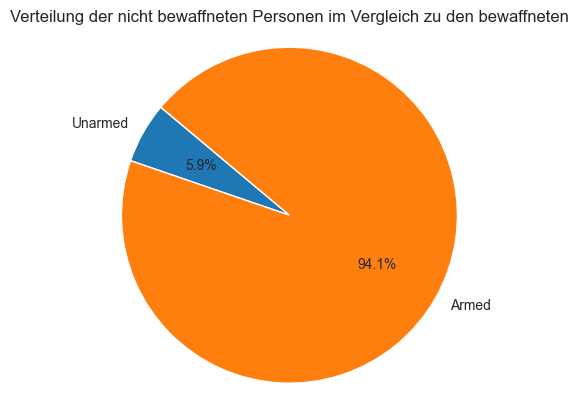

In [229]:
plt.pie(data_armed_unarmed, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Verteilung der nicht bewaffneten Personen im Vergleich zu den bewaffneten")
plt.show()

Anteil der schwarzen Bewaffneten im vergleich zu weißen bewaffneten

In [241]:
df_police_shooting.groupby(["race"]).agg({"armed": "value_counts"})

armed
race                        armed                     
Asian                       gun                     72
                            knife                   54
                            unarmed                  8
                            vehicle                  6
                            blunt_object             5
...                                                ...
White                       vehicle,knife,other      1
White,Black                 gun                      1
                            knife                    1
White,Black,Native American knife                    1
White,Hispanic              gun                      1

[100 rows x 1 columns]

In [246]:
def is_armed(wert):
    
    if wert != "unarmed":
        return 1
    else:
        return 0
    

In [249]:
df_police_shooting["is_armed"] = df_police_shooting["armed"].apply(is_armed)

In [257]:
is_armed_grouped_by_race = df_police_shooting.groupby(["race"]).agg({"is_armed": "value_counts"})

In [267]:
is_armed = df_police_shooting[df_police_shooting["is_armed"] == 1]

race
White                          4084
Black                          2080
Hispanic                       1454
Unknown                        1097
Asian                           160
Native American                 120
Other                            25
Black,Hispanic                    2
White,Black                       2
White,Black,Native American       1
Native American,Hispanic          1
White,Hispanic                    1
Name: count, dtype: int64

In [274]:
is_armed = is_armed["race"].value_counts()

KeyError: 'race'

In [297]:
is_armed_df = pandas.DataFrame(is_armed[:5])

array([[4084],
       [2080],
       [1454],
       [1097],
       [ 160]], dtype=int64)

In [298]:
is_armed_df.columns = ["number_unarmed"]

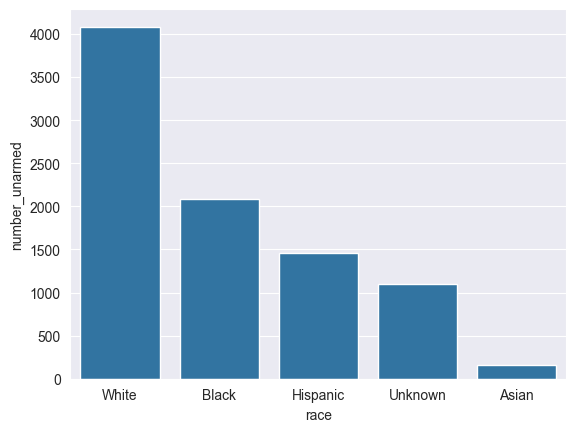

In [300]:
sns.barplot(x=is_armed_df.index, y=is_armed_df["number_unarmed"])
plt.show()

In [264]:
is_armed_grouped_by_race = is_armed_grouped_by_race[is_armed_grouped_by_race["is_armed"] == 1]
is_armed_grouped_by_race

,,is_armed
race,is_armed,
"Native American,Hispanic",1,1
"White,Black,Native American",1,1
"White,Hispanic",1,1


ANzahl der psychisch kranken nach Staat

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2024-04-17,NaN,NaN,male,gun,Unknown,Pueblo,CO,not,False,False,"Pueblo Police Department, CO"
9566,2024-04-17,NaN,NaN,male,gun,Unknown,Cabin Creek,WV,not,False,False,"Kanawha County Sheriff's Office, WV"
9567,2024-04-18,Jared Billard,NaN,male,undetermined,Unknown,Colchester,CT,NaN,False,False,"Colchester Police Department, CT"
9568,2024-04-18,Derrick Smith,34.0,male,blunt_object,Black,Lorain,OH,not,False,False,"U.S. Marshals Service, OH"


Was ist das durchschnittliche alter der psychisch ranken Opfer

In [267]:
df_police_shooting.groupby("signs_of_mental_illness").agg({"age": "mean"})

,age
signs_of_mental_illness,
False,36.822638
True,39.725416


Das durchschnittliche Alter der psychisch kranken Personen beträgt 40 Jahre




Was ist der prozentuale Anteil der psychisch kranken schwarzen und weißen

Wieviele unbewaffnete wurden nieder geschoßen. Verteilung nach weiß und schwarz

In [268]:
df_police_shooting.columns

Index(['date', 'name', 'age', 'gender', 'armed', 'race', 'city', 'state',
       'flee', 'body_camera', 'signs_of_mental_illness',
       'police_departments_involved', 'year'],
      dtype='object')

In [269]:
df_police_shooting.groupby("armed").agg({"race": "value_counts"})

race
armed               race          
blunt_object        White       98
                    Hispanic    58
                    Black       38
                    Unknown     31
                    Asian        5
...                            ...
vehicle,gun         Black        5
                    Hispanic     3
                    Unknown      3
vehicle,knife       Hispanic     2
vehicle,knife,other White        1

[100 rows x 1 columns]

In welche Staaten passieren die meisten Morde

In [293]:
unarmed_victims = df_police_shooting[df_police_shooting["armed"] == "unarmed"]

In [300]:
unarmed_victims = unarmed_victims["race"].value_counts()
unarmed_victims = pandas.DataFrame(unarmed_victims)
unarmed_victims

KeyError: 'race'

In [302]:
unarmed_victims.columns = ["number"]

In [304]:
unarmed_victims.index

Index(['White', 'Black', 'Hispanic', 'Unknown', 'Native American', 'Asian',
       'Other'],
      dtype='object', name='race')

<module 'matplotlib.pyplot' from 'C:\\Users\\Stefan\\Documents\\PycharmProjekte\\DeathsInvolvongPoliceDataAnalysis\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

TypeError: 'str' object is not callable

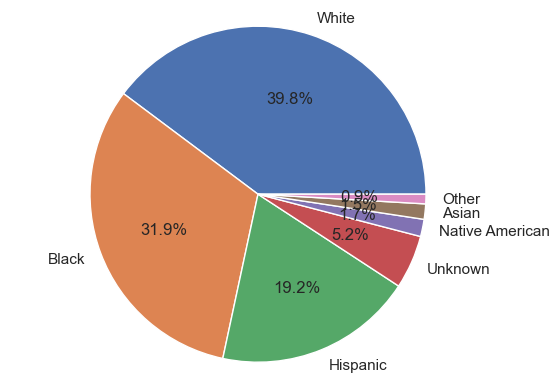

In [336]:
plt.pie(unarmed_victims["number"], labels=unarmed_victims.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Unarmed")
plt.show()

Wie hat sich die Anzahl der Morde in den letzten 10 Jahren entwickelt

In [306]:
df_police_shooting["date"] = pandas.to_datetime(df_police_shooting["date"])

In [318]:
df_police_shooting.sort_values(by="date", ascending=True, inplace=True)
police_shooting = df_police_shooting["year"].value_counts()
police_shooting = police_shooting.sort_index()

TypeError: 'numpy.ndarray' object is not callable

In [328]:
police_shooting = pandas.DataFrame(police_shooting)
police_shooting.columns = ["number_of_shootings"]
police_shooting = police_shooting[:-1]

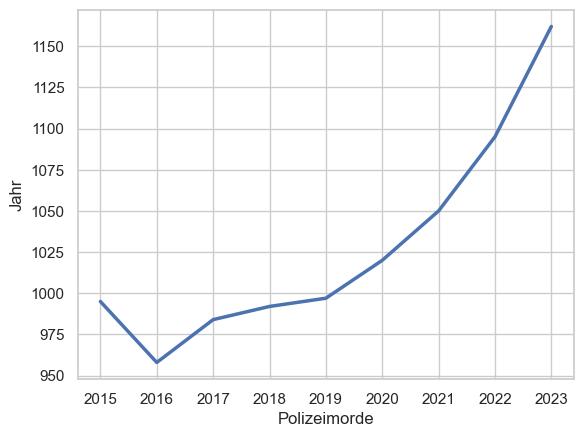

In [334]:
sns.set_theme(style="whitegrid")
sns.lineplot(data = police_shooting,x=police_shooting.index, y=police_shooting["number_of_shootings"], linewidth=2.5)

plt.xlabel("Polizeimorde")
plt.ylabel("Jahr")

plt.show()

In [315]:
df_police_shooting.sort_values(by="date")
df_police_shooting["date"].info()

<class 'pandas.core.series.Series'>
Index: 9570 entries, 0 to 9569
Series name: date
Non-Null Count  Dtype         
--------------  -----         
9570 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 149.5 KB


In [107]:
anzahl_nach_datum = df_police_shooting["year"].value_counts()
anzahl_nach_datum.colums = ["Anzahl"]
anzahl_nach_datum = pandas.DataFrame(anzahl_nach_datum)

In [112]:
anzahl_nach_datum.columns = ["number_of_victims"]

In [130]:
anzahl_nach_datum = anzahl_nach_datum.sort_index(ascending=True)[:-1]

In [110]:
sns.set_theme(style="whitegrid")

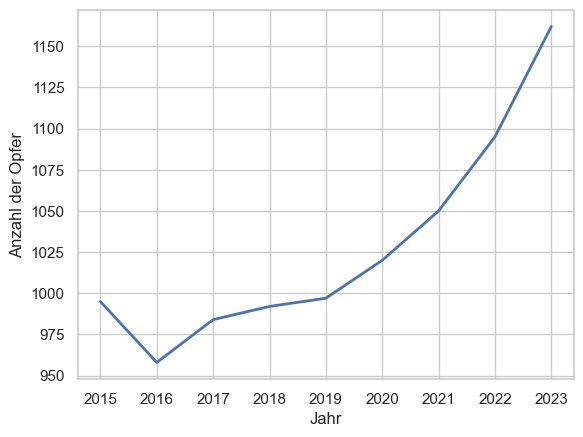

In [135]:
sns.lineplot(data=anzahl_nach_datum, x=anzahl_nach_datum.index, y=anzahl_nach_datum["number_of_victims"], linewidth=2, estimator="mean")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Opfer")
plt.title=("Anzahl der Opfer seit 2015")

In [106]:
df_police_shooting["year"] = df_police_shooting["date"].dt.year
df_police_shooting

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved,year
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR",2015
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA",2015
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS",2015
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK",2015
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2024-04-17,NaN,NaN,male,gun,Unknown,Pueblo,CO,not,False,False,"Pueblo Police Department, CO",2024
9566,2024-04-17,NaN,NaN,male,gun,Unknown,Cabin Creek,WV,not,False,False,"Kanawha County Sheriff's Office, WV",2024
9567,2024-04-18,Jared Billard,NaN,male,undetermined,Unknown,Colchester,CT,NaN,False,False,"Colchester Police Department, CT",2024
9568,2024-04-18,Derrick Smith,34.0,male,blunt_object,Black,Lorain,OH,not,False,False,"U.S. Marshals Service, OH",2024


Gab es nach der Black Lives Matter Bewegung weniger Morde an Schwarzen

In [139]:
black_victims = df_police_shooting[df_police_shooting["race"] == "Black"]
black_victims = black_victims["year"].value_counts()

In [144]:
black_victims = pandas.DataFrame(black_victims)

In [240]:
black_victims.columns = ["number_of_black_victims"]
black_victims = black_victims.sort_index()
black_victims = black_victims[:-1]

<Axes: xlabel='year', ylabel='number_of_black_victims'>

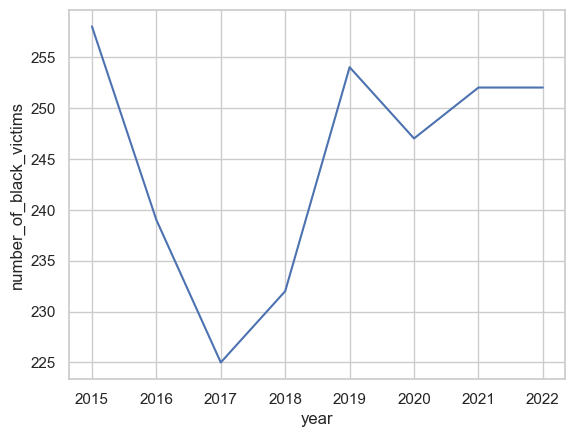

In [242]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=black_victims, x = black_victims.index, y = black_victims["number_of_black_victims"])

In [159]:
df_white_victims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 9559
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         4300 non-null   object 
 1   name                         4271 non-null   object 
 2   age                          4242 non-null   float64
 3   gender                       4296 non-null   object 
 4   armed                        4199 non-null   object 
 5   race                         4300 non-null   object 
 6   city                         4263 non-null   object 
 7   state                        4300 non-null   object 
 8   flee                         3740 non-null   object 
 9   body_camera                  4300 non-null   bool   
 10  signs_of_mental_illness      4300 non-null   bool   
 11  police_departments_involved  4300 non-null   object 
dtypes: bool(2), float64(1), object(9)
memory usage: 377.9+ KB


AttributeError: 'DataFrame' object has no attribute 'type'

In [215]:
white_victims = df_police_shooting[df_police_shooting["race"] == "White"]

In [222]:
white_victims = white_victims["year"].value_counts()
white_victims

KeyError: 'year'

In [224]:
white_victims

year
2015    505
2021    482
2018    474
2016    471
2020    465
2017    463
2022    457
2023    448
2019    432
2024    103
Name: count, dtype: int64

In [227]:
df_white_victims = pandas.DataFrame(white_victims)

In [229]:
df_white_victims.columns = ["number_of_victims"]

In [230]:
white_victims = pandas.DataFrame(white_victims)
white_victims

,count
year,
2015,505
2021,482
2018,474
2016,471
2020,465
2017,463
2022,457
2023,448
2019,432


In [237]:
white_victims.columns = ["number_of_white_victims"]

In [238]:
white_victims = white_victims.sort_index()


In [239]:
white_victims

,number_of_white_victims
year,
2015,505
2016,471
2017,463
2018,474
2019,432
2020,465
2021,482
2022,457
2023,448


In [243]:
victims_black_and_white = pandas.merge(white_victims, black_victims, on="year")

victims_black_and_white

,number_of_white_victims,number_of_black_victims
year,,
2015,505,258
2016,471,239
2017,463,225
2018,474,232
2019,432,254
2020,465,247
2021,482,252
2022,457,252


In [244]:
victims_black_and_white.index

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int32', name='year')

white_victims










TypeError: 'str' object is not callable

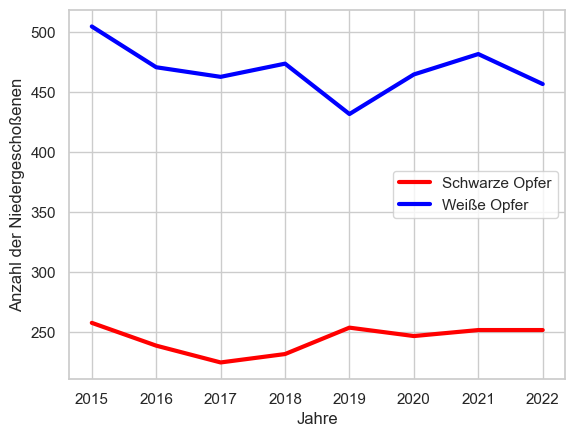

In [263]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=victims_black_and_white, x=victims_black_and_white.index, y = victims_black_and_white["number_of_black_victims"], label="Schwarze Opfer", color="red", linewidth=3)
sns.lineplot(data=victims_black_and_white, x=victims_black_and_white.index, y = victims_black_and_white["number_of_white_victims"], label="Weiße Opfer", color="blue", linewidth=3)

plt.xlabel("Jahre")
plt.ylabel("Anzahl der Niedergeschoßenen")
plt.title("Polizeimorde an Weißen und Schwarzen im Vergleich")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


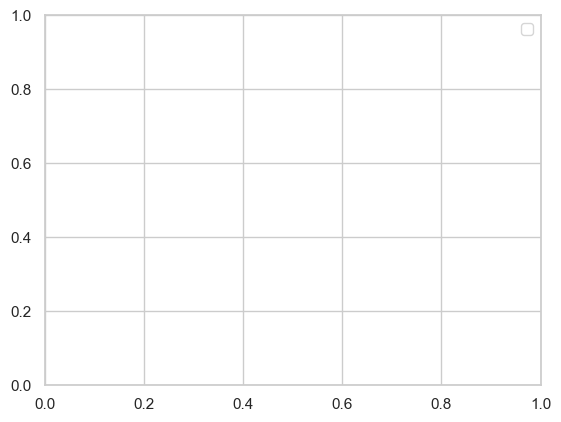

<h1>Vergleich mit anderen Dataframes</h1

Verteilung der Bevölkerung nach Bundestaaten

In [330]:
population_data = pd.read_csv("TotalPolulationData.csv")

In [331]:
population_df = pandas.DataFrame(population_data)

In [336]:
population_df = population_df.sum()

In [329]:
population_df

'Total5,024,279733,3917,151,5023,011,52439,538,2235,773,7143,605,944989,948689,54521,538,18710,711,9081,455,2711,839,10612,812,5086,785,5283,190,3692,937,8804,505,8364,657,7571,362,3596,177,2247,029,91710,077,3315,706,4942,961,2796,154,9131,084,2251,961,5043,104,6141,377,5299,288,9942,117,52220,201,24910,439,388779,09411,799,4483,959,3534,237,25613,002,7001,097,3795,118,425886,6676,910,84029,145,5053,271,616643,0778,631,3937,705,2811,793,7165,893,718576,8513,285,874'

In [339]:
population_df = pandas.DataFrame(population_df)

In [341]:
population_df.columns = ["population"]

In [362]:
population_df["population"] = population_df["population"].str.replace(",", "")

In [364]:
population_df["population"] = population_df["population"].astype(int)

In [366]:
population_df = population_df.drop(index="Label (Grouping)")

KeyError: "['Label (Grouping)'] not found in axis"

In [368]:
population_df = population_df.sort_values(by="population", ascending=False)

In [400]:
usa_states_most_population = population_df[:10]
usa_states_most_population.loc["Other"] = {"population": population_df[10:]['population'].sum()}

C:\Users\Stefan\AppData\Local\Temp\ipykernel_14796\3775625565.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [406]:
usa_states_most_population

,population
California,39538223
Texas,29145505
Florida,21538187
New York,20201249
Pennsylvania,13002700
Illinois,12812508
Ohio,11799448
Georgia,10711908
North Carolina,10439388
Michigan,10077331


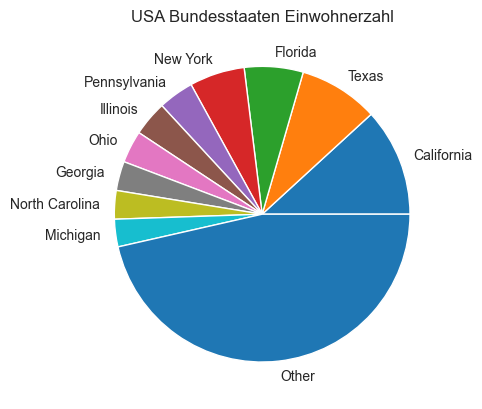

In [408]:
plt.pie(usa_states_most_population["population"], labels=usa_states_most_population.index)
plt.title("USA Bundesstaaten Einwohnerzahl")
plt.show()

In [396]:
population_df[10:]['population'].sum()

155468708

In [398]:
usa_states_most_population

,population,Other
California,39538223,155468708
Texas,29145505,155468708
Florida,21538187,155468708
New York,20201249,155468708
Pennsylvania,13002700,155468708
Illinois,12812508,155468708
Ohio,11799448,155468708
Georgia,10711908,155468708
North Carolina,10439388,155468708
Michigan,10077331,155468708


In [386]:
usa_states_most_population.loc["Other"] = {"population": population_df[10:]['population'].sum()}
usa_states_most_population

AttributeError: 'dict' object has no attribute 'loc'

<Axes: xlabel='None', ylabel='population'>

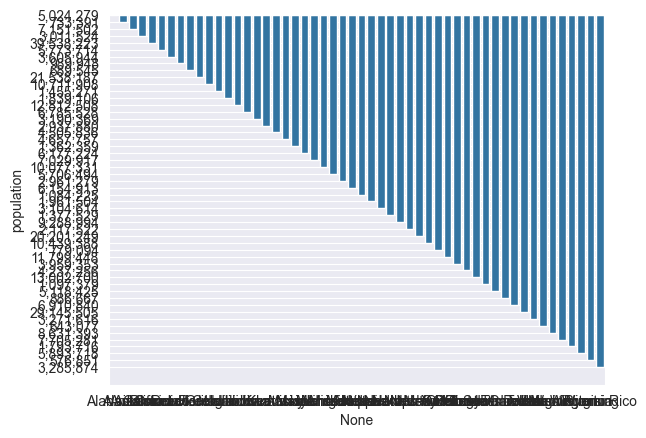

In [355]:
sns.barplot(x=population_df.index, y = population_df["population"])

Anzahl der getöteten Schwarzen im Vergleich zur Anzahl der schwarzen in der Gesamtbevölerung

In [ ]:
Wo ist der prozentual höchste Anteil der Polizeimorde

Anzahl der Frauenmorde

Anteil der schwarzen Bevölkerung in Amerika

In [414]:
race_distribution_data = pandas.read_csv("RaceDistribution.csv")

In [461]:
usa_race_df = pandas.DataFrame(race_distribution_data)

In [462]:
usa_race_df = usa_race_df.drop(columns = ["United States!!Margin of Error"])

In [463]:
usa_race_df = usa_race_df[1:3]

In [464]:
usa_race_df.columns = ["race", "number"]

In [465]:
usa_race_df

,race,number
1,White alone,"202,889,017"
2,Black or African American alone,"40,603,656"


In [466]:
usa_race_df.set_index("race", inplace=True)

In [467]:
usa_race_df

,number
race,
White alone,"202,889,017"
Black or African American alone,"40,603,656"


In [468]:
usa_race_df = usa_race_df["number"].str.replace(",", "")

In [469]:
usa_race_df["number"] = usa_race_df["number"].astype(int)

KeyError: 'number'

In [481]:
usa_race_df = pandas.DataFrame(usa_race_df)

In [507]:
usa_race_df.columns

Index(['number'], dtype='object')

In [514]:
usa_race_df["number"] = usa_race_df["number"].astype(int)

In [526]:
usa_race_df.index = ["White", "Black"]

In [527]:
usa_race_df

,number
White,202889017
Black,40603656


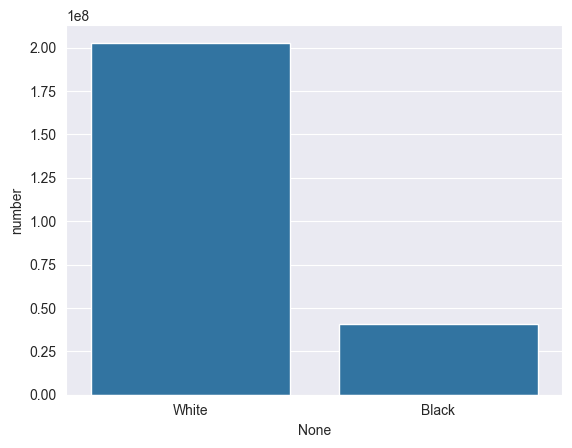

In [528]:
sns.barplot(data = usa_race_df, x=usa_race_df.index, y=usa_race_df["number"])
plt.show()

In [529]:
age_and_sex_data = pandas.read_csv("AgeAndSex.csv")

In [530]:
age_and_sex_df = pandas.DataFrame(age_and_sex_data)

In [534]:
age_and_sex_df.columns = ["age_group"]

Index(['Label (Grouping)', 'United States!!Total!!Estimate',
       'United States!!Total!!Margin of Error',
       'United States!!Percent!!Estimate',
       'United States!!Percent!!Margin of Error',
       'United States!!Male!!Estimate', 'United States!!Male!!Margin of Error',
       'United States!!Percent Male!!Estimate',
       'United States!!Percent Male!!Margin of Error',
       'United States!!Female!!Estimate',
       'United States!!Female!!Margin of Error',
       'United States!!Percent Female!!Estimate',
       'United States!!Percent Female!!Margin of Error'],
      dtype='object')

In [537]:
age_and_sex_df["United States!!Total!!Estimate"] = age_and_sex_df["United States!!Total!!Estimate"].str.replace(",", "")

In [544]:
age_and_sex_df["United States!!Total!!Estimate"] = age_and_sex_df["United States!!Total!!Estimate"].astype(int)

ValueError: cannot convert float NaN to integer

In [552]:
age_and_sex_df

,Label (Grouping),United States!!Total!!Estimate,United States!!Total!!Margin of Error,United States!!Percent!!Estimate,United States!!Percent!!Margin of Error,United States!!Male!!Estimate,United States!!Male!!Margin of Error,United States!!Percent Male!!Estimate,United States!!Percent Male!!Margin of Error,United States!!Female!!Estimate,United States!!Female!!Margin of Error,United States!!Percent Female!!Estimate,United States!!Percent Female!!Margin of Error
0,Total population,333287562,*****,(X),(X),"165,228,214","±33,974",(X),(X),"168,059,348","±33,976",(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,18358199,"±18,313",5.5%,±0.1,"9,394,890","±17,175",5.7%,±0.1,"8,963,309","±16,776",5.3%,±0.1
3,5 to 9 years,19770314,"±74,288",5.9%,±0.1,"10,110,917","±44,770",6.1%,±0.1,"9,659,397","±50,753",5.7%,±0.1
4,10 to 14 years,21220214,"±73,259",6.4%,±0.1,"10,892,415","±44,625",6.6%,±0.1,"10,327,799","±50,648",6.1%,±0.1
5,15 to 19 years,21785658,"±36,858",6.5%,±0.1,"11,167,522","±29,157",6.8%,±0.1,"10,618,136","±27,752",6.3%,±0.1
6,20 to 24 years,22446040,"±36,578",6.7%,±0.1,"11,488,577","±25,511",7.0%,±0.1,"10,957,463","±23,972",6.5%,±0.1
7,25 to 29 years,22007628,"±35,988",6.6%,±0.1,"11,245,260","±22,926",6.8%,±0.1,"10,762,368","±22,118",6.4%,±0.1
8,30 to 34 years,23225636,"±27,473",7.0%,±0.1,"11,785,090","±18,217",7.1%,±0.1,"11,440,546","±18,915",6.8%,±0.1
9,35 to 39 years,22335859,"±71,580",6.7%,±0.1,"11,322,522","±46,238",6.9%,±0.1,"11,013,337","±44,732",6.6%,±0.1


In [549]:
age_and_sex_df["United States!!Total!!Estimate"].

TypeError: can only concatenate str (not "int") to str